## Imports
---

In [1]:
import yfinance as yf
import quantstats as qs
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

## Helper functions
---

In [2]:
def dracula_theme(fig):
    fig.update_layout(
        template=None,
        plot_bgcolor="#282a36",
        paper_bgcolor="#282a36",
        font=dict(color="#f8f8f2"),
        xaxis=dict(
            showgrid=True,
            gridcolor="#44475a",
            zerolinecolor="#44475a",
            color="#f8f8f2"
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor="#44475a",
            zerolinecolor="#44475a",
            color="#f8f8f2"
        ),
        margin=dict(l=50, r=5, t=50, b=50)
    )
    return fig

## Load Data
---

In [3]:
df = yf.download('BTC-USD', start = '2010-01-01')[['Close']]
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


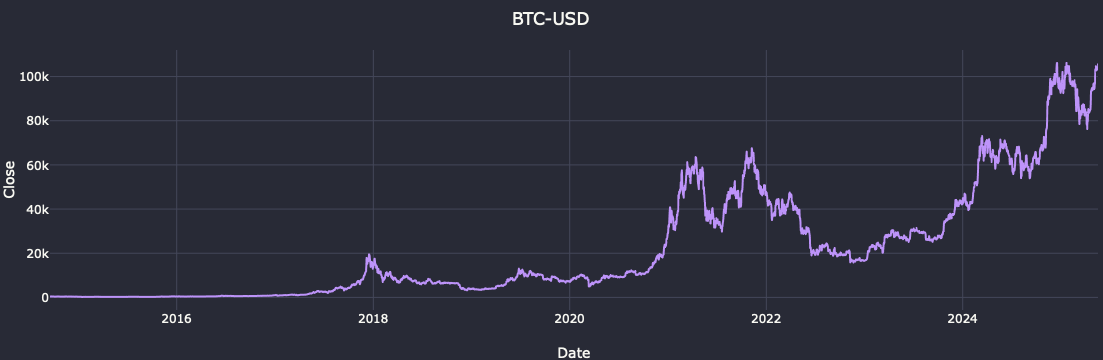

In [4]:
# removing columns MultiIndex
df.columns = df.columns.get_level_values(0)
df_reset = df.reset_index()

fig = px.line(df_reset, x='Date', y='Close', title='BTC-USD',
              color_discrete_sequence=['#BD93F9'])

dracula_theme(fig)
fig.show()

## Metrics Analysis
---

In [5]:
# calculating Sharpe and Sortino ratios considering a risk-free rate 5% per semester
sharpe_qs = pd.Series(qs.stats.rolling_sharpe(df['Close'], rf = 0.05).values.ravel())
sortino_qs = pd.Series(qs.stats.rolling_sortino(df['Close'], rf = 0.05).values.ravel())
sharpe_qs.index = df.index
sortino_qs.index = df.index

### correlation between indices

In [6]:
fig_corr = go.Figure()
fig_corr.add_trace(go.Scatter(x=sharpe_qs, y=sortino_qs,
                              mode='markers',
                              marker=dict(color='#FF79C6')))

fig_corr.update_layout(title='Correlation between indices', xaxis_title='Sharpe', yaxis_title='Sortino')

dracula_theme(fig_corr)
fig_corr.show()

In [7]:
corr, p = stats.pearsonr(sharpe_qs.dropna(), sortino_qs.dropna())
print('pearson-correl r=%.3f' %corr, 'p=%.3f' %p)

pearson-correl r=0.988 p=0.000


In [8]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=sharpe_qs.index, y=sharpe_qs, name='Sharpe', line=dict(color='#FFB86C')), secondary_y=False)
fig.add_trace(go.Scatter(x=sortino_qs.index, y=sortino_qs, name='Sortino', line=dict(color='#50FA7B')), secondary_y=False)
fig.add_trace(go.Scatter(x=df.index, y=np.log(df['Close']), name='log price BTC-USD', line=dict(color='#BD93F9')), secondary_y=True)

fig.update_yaxes(title_text='Risk-adjusted values', secondary_y=False)
fig.update_yaxes(title_text='log price BTC-USD', secondary_y=True)
fig.update_layout(title='Sharpe vs Sortino ratios', xaxis_title="Data")

dracula_theme(fig)
fig.show()